# K-means Clustering


K-means 알고리즘은 다음과 같은 과정으로 진행됩니다. 

Step 1. 군집의 개수 K 설정  
Step 2. 무작위로 K개의 초기 중심점 설정  
Step 3. 각 데이터에서 가장 가까운 중심을 찾아 할당  
Step 4. 군집에 속한 데이터의 평균값으로 군집 중심점 재설정  
Step 5. 데이터를 군집에 재할당  

중심점의 위치가 더 이상 변하지 않을 때까지 Step 4,5 반복

<img src = "https://i.imgur.com/WL1tIZ4.gif" height = 300 width = 500>

K-means 알고리즘을 Python으로 직접 구현하여 원리를 이해한 후, sklearn 라이브러리를 활용하여 구현하도록 하겠습니다.

## K-means 알고리즘 직접 구현

<b>Iris Dataset</b>

원래 label이 제공되지만, label이 없다고 가정하고 비지도학습 알고리즘인 K-means 군집화를 진행하도록 하겠습니다.

In [ ]:
# iris dataset 불러오기
from sklearn import datasets
iris = datasets.load_iris().data

# 데이터 일부 확인
print(iris[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


각 row는 하나의 데이터 sample을 나타냅니다. 

각 column은 feature를 나타내며 순서대로 sepal length(꽃받침의 길이), sepal width(꽃받침의 넓이), patal length(꽃잎의 길이), peatal width(꽃잎의 넓이)를 의미합니다.

sepal length와 width 두 가지 feature만을 고려하여 군집화하도록 하겠습니다.

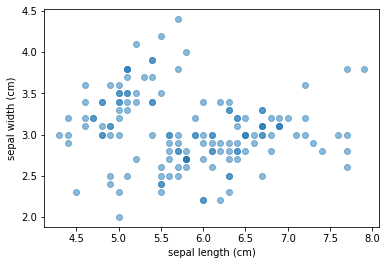

In [ ]:
# sepal length, sepal width 두 가지 feature만 고려
# 산점도 그리기(x축: length, y축: width)

from matplotlib import pyplot as plt

x = iris[:, 0]   #sepal length
y = iris[:, 1]   #sepal width

plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

K-means 알고리즘으로 비슷한 붓꽃끼리 군집화하는 것을 구현하도록 하겠습니다.

### Step 1. 군집의 개수 K 설정
3가지 종이 존재하므로 K=3으로 설정하겠습니다.

### Step 2. 무작위로 K개의 초기 중심점 설정

In [ ]:
import numpy as np
# Q. 군집 개수 k를 3으로 설정해주세요.
k = _

# Q. 랜덤으로 x, y 좌표 3개(k개)를 생성합니다
# (np.random.uniform은 주어진 최소, 최대값 사이에서 k 개 만큼 실수 난수를 생성합니다.)
centroids_x = _________________(min(x), max(x), _)
centroids_y = _________________(min(y), max(y), _)

centroids = list(zip(centroids_x, centroids_y))
centroids = np.array(centroids)

centroids 는 임의로 생성한 (x, y) 좌표 3개를 갖게 됩니다.

(random이기 때문에 매 실행마다 결과가 다릅니다.)

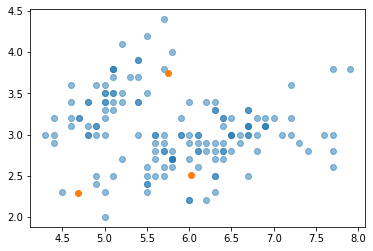

In [ ]:
# centroids 위치 확인
plt.scatter(x, y, alpha=0.5)	# 데이터들은 파란색으로 표시되고
plt.scatter(centroids_x, centroids_y)	# centroids는 주황색으로 표시됩니다
plt.show()

### Step 3. 각 데이터에서 가장 가까운 중심을 찾아 할당

Centroids를 지정했다면 이제 해당 centroids에 가까운 데이터들을 할당해줍니다.  
이 때 ‘가깝다’ 라는 것을 정량적으로 계산하기 위해 각 데이터를 벡터로 간주하여 유클리드 거리를 계산하도록 하겠습니다.  
먼저 두 데이터 포인트 사이의 거리를 계산하는 distance() 함수를 작성합니다.

$distance = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + \cdots + (a_n - b_n)^2}$

In [ ]:
# 유클리드 거리 계산 함수
def distance(a, b):
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))]) ** 0.5

이제 각 데이터들 별로 3개의 centroids와의 거리를 측정합니다. 이 때 labels 란 배열을 생성하고, 가장 가까운 centroids의 index를 저장하도록 합니다.

In [ ]:
# 각 데이터 포인트를 그룹화 할 labels을 생성합니다 (0, 1, 또는 2)
labels = np.zeros(len(iris))

sepal_length_width = np.array(list(zip(x, y)))

# 각 데이터를 순회하면서 centroids와의 거리를 측정합니다
for i in range(len(iris)):
  distances = np.zeros(k)	# 초기 거리는 모두 0으로 초기화 해줍니다
  for j in range(k):
    # Q. 각 데이터와 centroid 사이의 유클리드 거리를 계산해주세요. (위에서 유클리드 거리를 계산하는 함수를 정의했습니다.)
    distances[j] = _________(sepal_length_width[i], centroids[j])
  # Q. 각 데이터에서 가장 가까운 centroid의 index를 cluster에 반환해주세요.
  cluster = np.______(distances)	# (np.argmin은 가장 작은 값의 index를 반환합니다)
  labels[i] = cluster

이렇게 생성한 labels에는 0, 1 또는 2 가 저장되어 각 데이터가 어느 centroid그룹에 속해있는지를 나타내게 됩니다.  
각 데이터가 어느 그룹에 속하게 되었는지 눈으로 확인하기 위해 시각화 해봅시다.

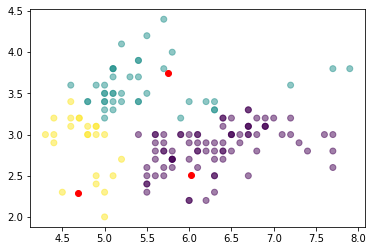

In [ ]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')	# centroid는 빨간색으로 나타냅니다
plt.show()

데이터들이 가까운 centroid에 잘 할당되어있지만, 처음 centroid를 선택할 때 랜덤으로 선택한 탓에 데이터를 잘 그룹화한 것 같지는 않습니다.

### Step 4. 군집에 속한 데이터의 평균값으로 군집 중심점 재설정

이제 centroids를 새롭게 지정함으로써 데이터를 더 잘 그룹화 할 수 있도록 만들어봅시다.  
우선 기존에 지정한 centroids를 복사해두어 centroids_old 에 저장하도록 합시다.  
이때 deep copy(깊은 복사)를 하기위해 python 라이브러리인 copy 를 import하여 활용합니다.

In [ ]:
from copy import deepcopy
centroids_old = deepcopy(centroids)

이제 각 그룹별로 데이터의 평균을 계산합니다. 즉, 각 데이터들의 평균 x좌표와 평균 y좌표를 계산하여 하나의 좌표를 계산합니다. 이렇게 계산된 좌표는 새로운 centroid로 지정됩니다.

In [ ]:
for i in range(k):
  # 각 그룹에 속한 데이터들만 골라 points에 저장합니다
  points = [ sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ]
  
  # points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정합니다
  # Q. points의 평균을 구해주세요.
  centroids[i] = np.____(points, axis=0)

새롭게 지정된 centroids는 어디에 위치하는지 확인해봅시다. 기존의 centroid는 파란색, 새롭게 지정된 centroids는 빨간색으로 나타냅니다.

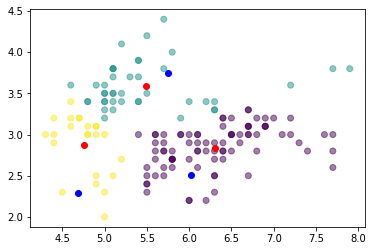

In [ ]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

Centroids가 전체적으로 중앙으로 이동하여 데이터의 중심 지점에 위치한 것을 확인할 수 있습니다.

### Step 5. 데이터를 군집에 재할당

### 중심점의 위치가 더 이상 변하지 않을 때까지 Step 4,5 반복

남은건 Step 4,5를 반복하여 최적의 centroids를 찾는 것입니다.  
반복을 하기 전에 error 라는 배열을 하나 만들어줍니다.  
error의 각 index는 centroids_old 와 새롭게 지정된 centroids 의 거리를 저장합니다.  
중심점의 위치가 더 이상 변하지 않으면 최적의 중심점입니다.  
따라서 이 거리(error)가 모두 0 이 되면 최적해에 수렴(convergence)한 것으로 판단하여 반복을 종료합니다. 

In [ ]:
centroids_old = np.zeros(centroids.shape)	# 제일 처음 centroids_old는 0으로 초기화 해줍니다
labels = np.zeros(len(iris))
error = np.zeros(k) # error 도 초기화 해줍니다

for i in range(k):
  error[i] = distance(centroids_old[i], centroids[i])

# error가 0에 수렴할 때 까지 2 ~ 3 단계를 반복합니다
while(error.all() != 0):
  # STEP 3: 가까운 centroids에 데이터를 할당합니다
  for i in range(len(iris)):
    distances = np.zeros(k)	# 초기 거리는 모두 0으로 초기화 해줍니다
    for j in range(k):
      distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)	# np.argmin은 가장 작은 값의 index를 반환합니다
    labels[i] = cluster

  # Step 4: centroids를 업데이트 시켜줍니다
  centroids_old = deepcopy(centroids)
  for i in range(k):
    # 각 그룹에 속한 데이터들만 골라 points에 저장합니다
    points = [ sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ]
    # points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정합니다
    centroids[i] = np.mean(points, axis=0)

  # 새롭게 centroids를 업데이트 했으니 error를 다시 계산합니다
  for i in range(k):
    error[i] = distance(centroids_old[i], centroids[i])

이제 최적의 centroids를 찾았으니 이를 시각화하여 확인합니다.   
직관적으로 알아보기위해 색을 r, g, b 로 설정해줍니다. 또 centroids는 다이아몬드 형태로 마킹해줍니다.

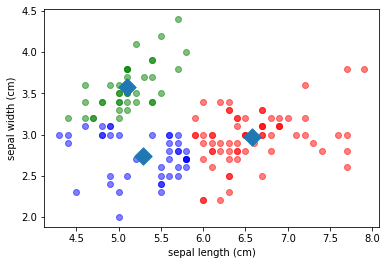

In [ ]:
colors = ['r', 'g', 'b']
for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

군집화가 잘 된 것을 확인할 수 있습니다.

## Scikit Learn - KMeans 클래스 이용

### 초기 중심점 무작위 선정

In [ ]:
from sklearn.cluster import KMeans

iris = datasets.load_iris().data

# Q. 3개의 군집으로 나누고, 초기 중심점을 무작위로 설정하는 K-Means 모델을 생성합니다.(init='random')
model1 = ______(n_clusters = _, init='______')
model1.fit(iris)
labels1 = model1.predict(iris)

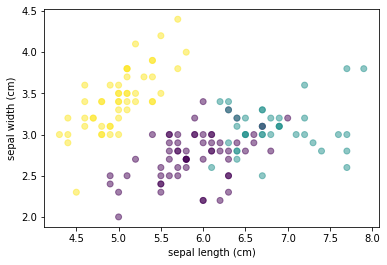

In [ ]:
# 클러스터링 결과를 시각화합니다
x = iris[:, 0]  #위와 동일하게 sepal length와 width만 이용
y = iris[:, 1]
plt.scatter(x, y, c=labels1, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

초기 중심점을 무작위로 설정했기 때문에 군집 결과가 매번 달라지게 됩니다. 또한, KMeans는 초기값에 민감하다는 단점이 있기 때문에 무작위성으로 군집 결과가 좋지 않을 수 있습니다.   
이러한 문제점을 해결하기 위해 초기 중심점을 K-Means++ 방법을 이용하여 설정합니다.

### K-Means++로 초기 중심점 설정

In [ ]:
# Q. 3개의 군집으로 나누고, 초기 중심점을 K-Means++으로 모델을 생성합니다.(init='k-means++')
model2 = ______(n_clusters = _, init='_______')
model2.fit(iris)
labels2 = model2.predict(iris)

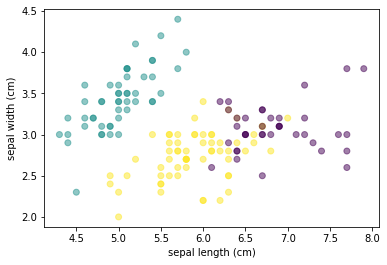

In [ ]:
# 클러스터링 결과를 시각화합니다
plt.scatter(x, y, c=labels2, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

이번 데이터에서는 초기 중심점을 무작위로 설정했을 때와 결과가 비슷합니다.  
그러나 초기 중심점을 무작위로 설정하는 것보단 K-Means++ 방법을 이용하는 것이 더 효과적입니다.  
KMeans 클래스의 초기 중심점 파라미터인 init의 default 값은 'k-means++' 이므로 따로 설정해줄 필요는 없습니다.

### 최적의 군집 개수 K 설정(엘보우 방법)

iris 데이터에서는 이미 군집이 3개인 것을 알고 있었기 때문에 군집 개수 K를 설정하는 것이 쉬웠지만, label이 없는 데이터에서는 군집이 몇 개인지 알기 어렵습니다. 최적의 군집 개수 K를 설정하기 위해 엘보우 방법을 이용합니다.

In [ ]:
from sklearn.datasets import make_blobs

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=42)
print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력

(100, 2) [[-6.2927701  -4.68965397]
 [ 2.03530213  5.61498563]
 [-2.97261532  8.54855637]
 [ 0.64463087  3.22362652]
 [-8.73867639  6.82004726]
 [-7.22234171 -7.68238686]
 [ 5.00151486  1.32804993]
 [ 4.1607046   1.78751071]
 [ 4.6040528   3.53781334]
 [-3.10983631  8.72259238]]


In [ ]:
# 엘보우 방법 함수 정의
# 군집의 개수 증가에 따른 이너셔 값 변화 확인
def elbow(data, length):  # length: (최대 군집 개수-1)
  inertia = []
  for k in range(2,length):
    # Q. 군집 개수가 k인 K-Means 모델을 생성합니다.
    kmeans = ______(n_clusters=_, random_state=42)
    kmeans.fit(data)
    # Q. KMeans 모델에서 이너셔 값을 계산해주는 inertia_ 속성을 inertia 리스트에 추가해주세요.
    inertia.append(kmeans.________)
  plt.plot(range(2,length), inertia)
  plt.xlabel('Number of Clusters(k)')
  plt.ylabel('inertia')
  plt.show()

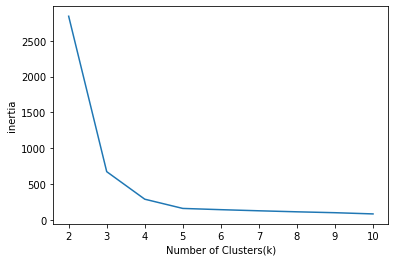

In [ ]:
elbow(points, 11)

K가 5일 때부터 이너셔 값이 감소하는 폭이 많이 줄어든 것을 확인할 수 있습니다.  
이 지점부터는 군집 개수를 늘려도 군집에 잘 밀집된 정도가 크게 개선되지 않기 때문에 군집 개수 K를 5로 설정합니다.

# PCA

## 1. iris 데이터 실습

### **데이터 불러오기**
iris 데이터로 pca를 구현해보겠습니다.
우선 필요한 파일을 import 하고 iris 데이터 파일을 불러옵니다.

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
#head()로 데이터 확인
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **표준화**

pca를 하기 전에 데이터의 scale에 따라 주성분의 설명 가능한 분산량이 달라질 수 있기 때문에 scaling 을 진행합니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
x = ________________________ # target을 제외한 value값만 추출
y = ________________________ # target의 value만 추출

x = StandardScaler().fit_transform(x) # fit_transform()으로 x에 x를 표준화한 데이터를 저장

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head() # dataframe으로 표준화된 데이터 확인

### **PCA 실행**

In [ ]:
from sklearn.decomposition import PCA
# 주성분 2개로 설정
pca = PCA(n_components=__) 
printcipalComponents = pca.fit_transform(x)
# printcipalComponents 데이터 프레임 구성 (컬럼명 'principal component1', 'principal component2'로 설정)
principalDf = ________________________________________________________________________________

In [ ]:
# head()로 dataframe 확인
principalDf.head()

,principal component1,principal component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
# explained_variance_ratio_로 pc1와 pc2의 전체 데이터의 분산 설명 가능성
pca.____________________________

array([0.72770452, 0.23030523])

In [ ]:
# sum()으로 pc1와 pc2의 전체 데이터의 분산 설명 가능성 총합 확인
_______________________________

0.9580097536148197

따라서 두 개의 주성분이 전체 분산의 약 96%를 설명합니다. 따라서 주성분 개수를 2개로 결정하는 것은 적절하다고 볼 수 있습니다. 

만약 주성분을 3개로 설정하면 어떻게 될까요?

In [ ]:
# 주성분 3개로 설정
pca = PCA(______________)
printcipalComponents = pca.fit_transform(x)
# printcipalComponents 데이터 프레임 구성 (컬럼명 'principal component1', 'principal component2', 'principal component3'로 설정)
principalDf = __________________________________________________________________________________

In [ ]:
# 각 주성분의 전체 데이터의 분산 설명 가능성
__________________________________

array([0.72770452, 0.23030523, 0.03683832])

3번째 주성분의 분산 설명력은 0.03밖에 되지 않습니다. 따라서 더 이상 주성분을 추가하지 않고 주성분 분석을 진행하는 것이 적절하다고 볼 수 있습니다. 

### **iris species 시각화**

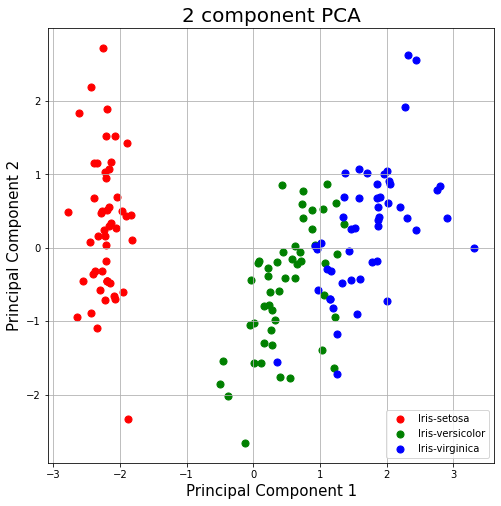

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

그래프를 그려본 결과, 두 개의 주성분으로 iris 전체 데이터를 잘 표현할 수 있음을 알 수 있습니다.

## 2. mnist 데이터 실습

**제목과 주석을 보고 빈 칸을 채워주세요!**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA

### 데이터 불러오기 및 전처리

mnist 손글씨 데이터(mnist)

In [ ]:
# colab sample_data
mnist = pd.read_csv('/content/sample_data/mnist_train_small.csv').iloc[:,1:]
m_y = pd.read_csv('/content/sample_data/mnist_train_small.csv').iloc[:,0]
print(mnist.shape)
# 784차원 데이터셋

(19999, 784)


In [ ]:
mnist.head() # mnist는 특성(픽셀)의 스케일이 동일하므로 표준화 불필요

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### mnist 손글씨 이미지 확인하는 방법




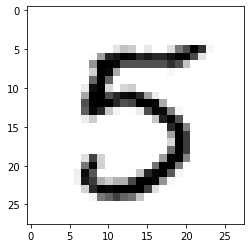

In [ ]:
plt.imshow(mnist.values[0].reshape(-1,28), cmap='gray_r');

### mnist 데이터(784차원)

#### 주성분 분석(분산이 가장 큰 16개의 주성분 사용)

PCA(n_components=None) 클래스
>n_components : 주성분의 개수
- 축소할 차원 수
- 평균중심화된 데이터셋의 공분산 행렬로부터 사용할 고유벡터의 개수
- 0 < f < 1 인 소수 f로 지정하면 설명된 분산이 f보다 커지는 최소 개수의 주성분만 선택

components_ 속성 : 주성분 반환
- 행벡터가 공분산 행렬의 고유벡터로 구성된 행렬

In [ ]:
# 주성분 개수 16개, random_state=0으로 설정
pca = PCA(__________________________)
pca.fit(mnist)
print(pca.components_.shape)
# 하나의 행이 하나의 주성분

(16, 784)


#### 손글씨 이미지 출력 함수 구현

In [ ]:
# shape이 (n,784)인 넘파이 배열을 입력하면 n개의 손글씨 이미지를 출력
# ratio는 이미지 배율
def draw_digits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows<2 else 10
  fig, axes = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axes[i,j].imshow(arr[i*10+j].reshape(-1,28), cmap='gray_r')
      axes[i,j].axis('off')
  plt.show()

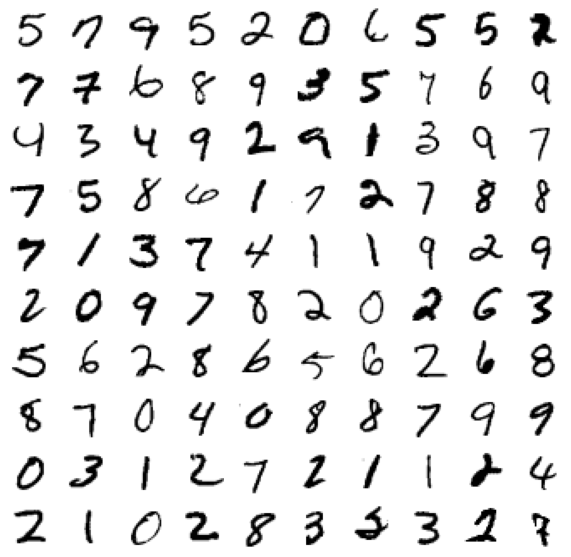

In [ ]:
# mnist 데이터셋에서 처음 100개 확인
draw_digits(__________________) # 넘파이 배열로 입력

#### 주성분만 그리기

각 주성분도 784차원의 벡터이므로 이미지로 출력 가능

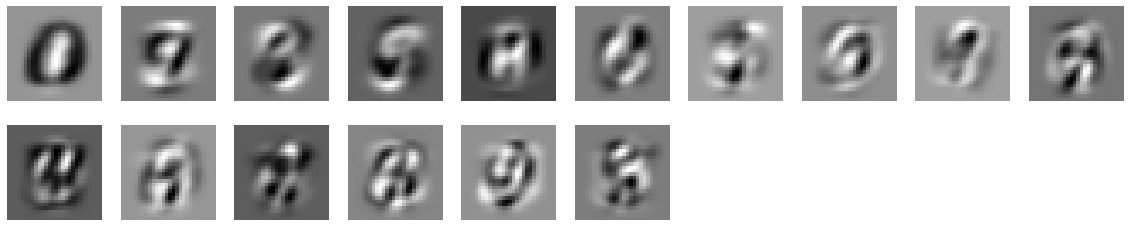

In [ ]:
draw_digits(pca.components_, ratio=2)

- 각 주성분을 데이터셋에 잠재된 어떤 16개의 특성으로 생각
- 순서대로 분산이 큰 특성
- 전체적으로 해석이 주관적이거나 어려움

#### 차원 축소(784차원 $→$ 16차원)
16개의 주성분에 대한 내적으로 구성된 데이터셋

transform() 메서드 : 축소된 데이터셋으로 변환
- 입력은 원래 데이터셋
- fit_transform() 메서드 가능

In [ ]:
mnist_reduced = pd.DataFrame(pca.transform(mnist))
print(mnist_reduced.shape)
mnist_reduced.head()

(19999, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,446.468432,-254.669627,-804.159745,-323.753913,244.423683,-135.258960,-322.732559,-120.429028,-251.630508,205.499240,-0.083368,-139.209902,43.877342,322.119247,6.714649,-79.246287
1,509.220207,729.949588,194.942943,-413.931896,837.819586,-388.371884,-223.806001,101.526098,98.006751,-239.765972,40.020283,138.717186,122.651915,4.932370,407.459445,186.187010
2,346.927822,716.677307,-727.558767,193.175466,-78.916540,-321.949576,-356.070957,214.893929,341.277044,-64.543252,156.903923,7.677759,193.251545,512.761136,27.691062,-448.273913
3,447.113254,-303.558798,-879.921161,-7.248106,363.478552,-50.556188,-241.045144,-273.585673,22.424137,483.195475,88.157184,-149.232425,-120.520337,-32.770363,-100.424246,-113.733011
4,324.505202,-126.923973,598.320073,373.294753,-75.536025,505.193350,-24.474375,240.101765,-854.825855,125.855364,275.804410,-96.319852,-57.786095,262.679310,-51.700664,40.269399


#### 차원 축소 수식 검증
>$T_{16}=XW_{16}$
- $X$는 평균중심화가 수행된 데이터셋
- $W_{16}$은 열벡터가 주성분

mean_ 속성 : 원래 데이터셋의 특성별 평균

In [ ]:
# 평균중심화, 행렬곱 연산자 @, 전치 T를 적절히 사용하여 위 코드와 실행 결과가 동일해야 함
# shape 힌트 : (19999,16) = (19999,784) @ (784,16)
# pca.mean_과 mnist.mean(axis=0)는 동등 표현
X = mnist - pca.mean_
W_16 = pca.components_.T
T_16 = X @ W_16
T_16.head()
# 즉, mnist_reduced와 T_16은 동일

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,446.468432,-254.669627,-804.159745,-323.753913,244.423683,-135.258960,-322.732559,-120.429028,-251.630508,205.499240,-0.083368,-139.209902,43.877342,322.119247,6.714649,-79.246287
1,509.220207,729.949588,194.942943,-413.931896,837.819586,-388.371884,-223.806001,101.526098,98.006751,-239.765972,40.020283,138.717186,122.651915,4.932370,407.459445,186.187010
2,346.927822,716.677307,-727.558767,193.175466,-78.916540,-321.949576,-356.070957,214.893929,341.277044,-64.543252,156.903923,7.677759,193.251545,512.761136,27.691062,-448.273913
3,447.113254,-303.558798,-879.921161,-7.248106,363.478552,-50.556188,-241.045144,-273.585673,22.424137,483.195475,88.157184,-149.232425,-120.520337,-32.770363,-100.424246,-113.733011
4,324.505202,-126.923973,598.320073,373.294753,-75.536025,505.193350,-24.474375,240.101765,-854.825855,125.855364,275.804410,-96.319852,-57.786095,262.679310,-51.700664,40.269399


In [ ]:
# mnist_reduced과 T_16의 모든 값이 같음을 확인 (힌트: all())
______________________________________

True

#### 데이터 복원(16차원 $→$ 784차원)
축소된 데이터셋과 16개 주성분의 일차결합으로 재구성(근사)된 데이터셋

inverse_transform() 메서드 : 데이터셋을 복원
- 입력은 축소된 데이터셋
- 원래 데이터셋의 특성 이름 사용 가능

In [ ]:
# mnist_reduced 복원하기
mnist_recon = _______________________________
print(mnist_recon.shape)
mnist_recon = pd.DataFrame(mnist_recon, columns=mnist.columns)
mnist_recon.head()

(19999, 784)


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,-1.032055e-14,4.399490e-15,6.888562e-14,4.592462e-14,-6.004975e-14,4.120501e-15,4.960426e-14,3.132588e-14,2.505190e-14,2.311132e-15,...,0.736496,0.278769,0.066765,0.015045,0.034612,0.007019,0.0,0.0,0.0,0.0
1,-5.151928e-14,5.139637e-14,4.425280e-14,-1.107136e-14,1.865705e-13,1.034977e-14,-2.863643e-14,-4.319834e-14,7.696372e-15,-2.768326e-14,...,1.121593,0.427810,0.192830,0.059878,0.154598,0.033113,0.0,0.0,0.0,0.0
2,2.616388e-14,2.280556e-14,2.682368e-14,-2.782135e-14,1.625896e-14,-1.541284e-14,5.617569e-14,-1.274774e-13,-1.932738e-15,-1.388158e-14,...,2.347618,0.980925,0.320511,0.086272,0.140170,0.026390,0.0,0.0,0.0,0.0
3,-1.024785e-14,-1.358546e-14,1.294691e-13,2.291912e-14,-7.228958e-14,3.680649e-15,2.533859e-14,3.095378e-14,3.673099e-14,3.084829e-14,...,0.592185,0.215000,0.081044,0.060658,0.164662,0.033254,0.0,0.0,0.0,0.0
4,6.669470e-14,2.828307e-14,-4.423886e-14,-2.012871e-15,-2.728851e-14,4.923931e-15,5.263718e-14,1.507038e-13,4.917206e-14,-2.044249e-14,...,-0.432055,-0.216148,-0.062939,-0.031672,-0.035763,-0.012947,0.0,0.0,0.0,0.0


#### 데이터 복원 수식 검증
>$X_{16}=T_{16}W_{16}^T=XW_{16}W_{16}^T$
- $X$는 평균중심화가 수행된 데이터셋이므로 위 수식을 계산 후 평균중심화도 해제
- $W_{16}$은 열벡터가 주성분
- $X_{16}$은 $16$차원 공간에 정사영으로 근사된 데이터셋

In [ ]:
# 행렬곱 연산자 @, 전치 T를 적절히 사용하여 위 코드와 실행 결과가 동일해야 함
# shape 힌트 : (19999,784) = (19999,16) @ (16,784)
# 이전 단계에서 구한 T_16과 W_16을 그대로 사용
X_16 = T_16 @ W_16.T
X_16 += pca.mean_ # 평균중심화 해제
X_16 = pd.DataFrame(X_16.values, columns=mnist.columns)
X_16.head()
# 즉, mnist_recon과 X_16은 동일

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,-1.032055e-14,4.399490e-15,6.888562e-14,4.592462e-14,-6.004975e-14,4.120501e-15,4.960426e-14,3.132588e-14,2.505190e-14,2.311132e-15,...,0.736496,0.278769,0.066765,0.015045,0.034612,0.007019,0.0,0.0,0.0,0.0
1,-5.151928e-14,5.139637e-14,4.425280e-14,-1.107136e-14,1.865705e-13,1.034977e-14,-2.863643e-14,-4.319834e-14,7.696372e-15,-2.768326e-14,...,1.121593,0.427810,0.192830,0.059878,0.154598,0.033113,0.0,0.0,0.0,0.0
2,2.616388e-14,2.280556e-14,2.682368e-14,-2.782135e-14,1.625896e-14,-1.541284e-14,5.617569e-14,-1.274774e-13,-1.932738e-15,-1.388158e-14,...,2.347618,0.980925,0.320511,0.086272,0.140170,0.026390,0.0,0.0,0.0,0.0
3,-1.024785e-14,-1.358546e-14,1.294691e-13,2.291912e-14,-7.228958e-14,3.680649e-15,2.533859e-14,3.095378e-14,3.673099e-14,3.084829e-14,...,0.592185,0.215000,0.081044,0.060658,0.164662,0.033254,0.0,0.0,0.0,0.0
4,6.669470e-14,2.828307e-14,-4.423886e-14,-2.012871e-15,-2.728851e-14,4.923931e-15,5.263718e-14,1.507038e-13,4.917206e-14,-2.044249e-14,...,-0.432055,-0.216148,-0.062939,-0.031672,-0.035763,-0.012947,0.0,0.0,0.0,0.0


In [ ]:
# mnist_recon과 X_16의 모든 값이 같음을 확인 (힌트: all())
_____________________________________________

True

#### 복원된 손글씨 이미지를 확인

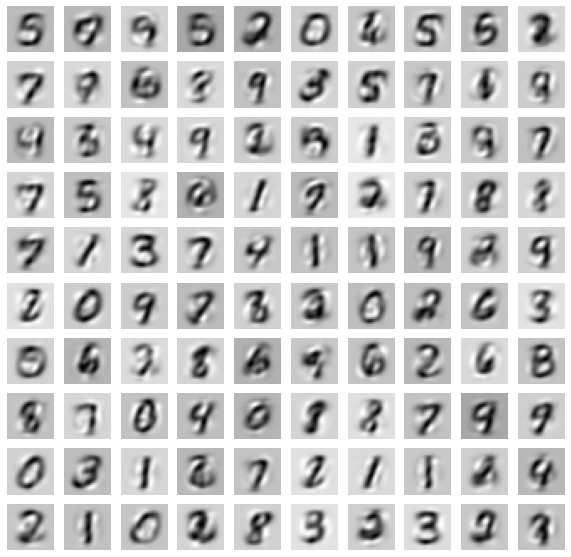

In [ ]:
# 복원된 데이터셋 mnist_recon에서 처음 100개 확인
draw_digits(mnist_recon[:100].values) # 넘파이 배열로 입력

데이터 근사에 대한 저장 공간 효율
- 원래 데이터셋의 저장에 필요한 공간에 대한 축소된 데이터셋과 주성분의 저장에 필요한 공간의 비율
>$n\times p → n\times L\space+\space L\times p$ 이므로 $space\space ratio=\frac{nL+Lp}{np}=\frac{L}{p}+\frac{L}{n}$

n_components_ 속성 : 주성분 개수 $L$  
n_features_ 속성 : 원래 데이터셋의 특성 개수 $p$  
n_samples_ 속성 : 원래 데이터셋의 표본 개수 $n$

In [ ]:
space_ratio = __________________________________________________________________
space_ratio # 원래 저장 공간의 약 2%만 있어도 위 실행 결과 정도의 근사가 가능 

0.02120820326730622

#### 설명된 분산
16개 주성분에 보존된 원래 데이터의 분산

explained_variance_ 속성 : 각 주성분에 의해 설명된 분산을 반환
- 주성분의 순서대로 큰 분산이므로 내림차순
- 원래 데이터셋에 대한 공분산 행렬의 가장 큰 16개의 고윳값
- explained_variance_ratio_ 속성 : 원래 데이터의 전체 분산 중 각 주성분에 의해 설명된 분산의 비율

In [ ]:
# 각 주성분에 의해 설명된 분산과 분산의 비율 구하기
print(_________________________)
print(__________________________)

[333721.15996859 242964.56161287 214452.15220907 187523.14783232
 167177.12081048 147160.86125233 112075.18037463  99222.81862271
  94530.57698986  80904.70989812  72997.82131043  68849.89786872
  58566.00938264  58203.31392305  54135.36927562  50242.25210912] 

[0.09722679 0.07078564 0.06247879 0.05463326 0.04870562 0.04287405
 0.03265214 0.02890772 0.02754067 0.02357089 0.02126729 0.02005883
 0.0170627  0.01695704 0.01577187 0.01463765]


In [ ]:
# 원래 데이터의 전체 분산 중 주성분에 의해 설명된 총 분산의 비율
np.sum(pca.explained_variance_ratio_)
# 전체 분산의 60%를 설명

0.595130938270316

#### 설명된 분산과 고윳값의 관계 검증
$⋆$ 각 주성분에 의해 설명되는 분산은 원래 데이터셋에 대한 공분산 행렬의 고윳값과 동일

- np.cov() 함수 : 공분산 행렬 계산
- np.linalg.eigh() 함수 : 대칭행렬에 대한 (고윳값 리스트, 고유벡터 리스트) 반환
 - 공분산 행렬은 대칭행렬

In [ ]:
# 열을 변수(특성)로 mnist의 공분산 행렬 계산
m_cov = np.cov(mnist, rowvar=False) # True or False
# 고윳값과 고유벡터 계산
e_val, e_vec = np.linalg.eigh(m_cov)
# 가장 큰 16개의 고윳값을 확인; 위에서 구한 설명된 분산과 동일 (힌트: np.sort())
print(_________________________) # 기술적 문제로 근소한 차이가 날 수 있음

[333721.15996859 242964.56161287 214452.15220909 187523.14783237
 167177.12081061 147160.86125299 112075.18040027  99222.81881413
  94530.57722085  80904.71263544  72997.83239459  68850.10493403
  58567.18779587  58203.58101023  54136.12512362  50243.57631008]


#### 주성분 개수의 결정
>$\frac{\sum_{k=1}^{L}λ_k}{\sum_{k=1}^{p}λ_k}\geqslant0.9$를 만족하는 가장 작은 $L$을 채택
- 앞선 검증에 의해, 이 수식은 설명된 총 분산의 비율이 0.9 이상인 것과 동치

153


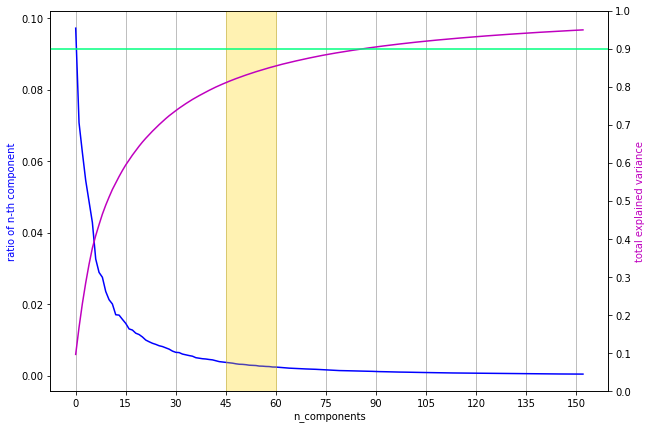

In [ ]:
# 위에서 확인한 결과 60%의 분산을 설명하므로 다시 학습
# 95%의 분산을 설명하도록 학습한 다음 scree plot을 그려 90% 지점 확인
pca = PCA(________________) # 설명할 총 분산 비율의 임계값으로 지정 가능
mnist_reduced = pca.fit_transform(mnist)
print(pca.n_components_) # 학습된 주성분의 개수 확인

# scree plot 겹쳐 그리기
fig, ax1 = plt.subplots(figsize=(10,7))
# 1. 각 주성분이 설명하는 분산 비율
ax1.plot(pca.explained_variance_ratio_, color='b')
ax1.set_xlabel('n_components')
ax1.set_ylabel('ratio of n-th component', color='b')
ax1.set_xticks(np.arange(0,151,15))
ax1.grid(axis='x')
# 2. n개의 주성분이 설명하는 총 분산 비율
ax2 = ax1.twinx()
ax2.plot(np.cumsum(pca.explained_variance_ratio_), color='m') # 누적합
ax2.set_ylabel('total explained variance', color='m')
ax2.set_yticks(np.arange(0,1.1,0.1))
ax2.axhline(y=0.9, color='springgreen')
ax2.axvspan(45, 60, alpha=0.3, color='gold')
plt.show()

# 분산의 95%를 설명하려면 153개의 주성분 필요
# 분산의 90%를 설명하려면 85~90개의 주성분 필요; 초록색과 자주색 교점 확인
# 엘보우 방법에 의하면 45~60개의 주성분 필요; 노란색 영역 확인

수고하셨습니다!